In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
import plotly_express as px
import plotly.io as pio
pio.renderers.default = 'colab'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from datasets import fake_br_corpus

In [4]:
train = fake_br_corpus.loadTrain()#.sample(100)
train

,id,author,average sentence length,average word length,category,date of publication,diversity,emotiveness,filename,label,...,number of singular first and second personal pronouns,number of subjuntive and imperative verbs,number of tokens,number of types,number of verbs,number of words in upper case,number of words without punctuation,pausality,percentage of news with speeling errors,text
0,5134,None,26.4167,4.86120,politica,21/11/2016,0.567823,0.118750,1931.txt,fake,...,1,3,370,180,66,1,317,4.41667,0.000000,"Em depoimento de Delcídio, advogados de Lula ..."
1,2773,"Vera Rosa, O Estado de S. Paulo",26.4103,4.66117,tv_celebridades,18 de março de 2018,0.463107,0.210638,1648.txt,true,...,1,11,1186,477,164,23,1030,4.00000,0.000000,"À procura de partido menor, Meirelles continua..."
2,1064,Carla AraújoBRASÍLIA,30.9714,5.15221,politica,10 de outubro de 2017,0.486162,0.236443,2767.txt,true,...,0,7,1210,527,149,40,1084,3.60000,0.003690,"O ministro do Supremo Tribunal Federal (STF),..."
3,1504,Por G1 Caruaru,14.1250,5.15929,tv_celebridades,29/03/2018 17h25,0.557522,0.190476,1397.txt,true,...,0,0,125,63,10,0,113,1.50000,0.000000,Diocese de Caruaru realiza Missa dos Santos Ól...
4,5360,None,20.5714,5.21528,politica,30/12/2015,0.607639,0.195652,3369.txt,fake,...,0,5,328,175,47,2,288,2.85714,0.013889,Governo Federal cortou verbas de pesquisa que ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,467,"Por Lucas Soares e Camilla Resende (*), Vargin...",20.0465,4.57193,politica,29/03/2018 09h09,0.475638,0.269634,495.txt,true,...,10,3,981,410,169,3,862,2.76744,0.000000,Empreendedores aproveitam a Páscoa para gerar ...
6116,4078,None,11.8261,5.26103,sociedade_cotidiano,08/05/2017,0.672794,0.301724,1266.txt,fake,...,0,4,314,183,42,1,272,1.82609,0.003676,"Kim Jon-un perde a cabeça, ameaça a China e re..."
6117,559,None,24.1667,4.74207,politica,3/1/2018,0.448276,0.173633,246.txt,true,...,0,7,820,325,97,16,725,3.16667,0.001379,efesa de Lula reitera pedido para que ex-presi...
6118,1540,Breno Pires,19.6136,4.96871,sociedade_cotidiano,28/2/2018,0.477404,0.224000,295.txt,true,...,0,7,987,412,139,17,863,2.81818,0.002318,"Em 1a reunião, Cármen e Jungmann discutem Cada..."


In [ ]:
display(
    px.pie(train, names='label'),
    px.pie(train, names='category'),
    px.histogram(train, x='category', color='label', barmode='group'),
)

In [ ]:
from preprocessing import preprocess
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    preprocessor=preprocess,
    ngram_range=(1,3),
    max_features=1000
)

def countFeatures(X):
    return pd.DataFrame(
        [(label, (row>0).sum()) for label, row in zip(train.label, X)], columns=['label', 'numFeatures']
    )

def extractFeatures(texts):
    # texts = train.text
    return tfidf.fit_transform(texts).toarray()

X = extractFeatures(train.text)

featureCounts = countFeatures(X)

In [ ]:
display(
    X,
    featureCounts,
    featureCounts.sort_values('numFeatures'),
    px.violin(featureCounts, y='numFeatures', color='label'),
    px.histogram(featureCounts, x='numFeatures', color='label', barmode='stack'),
)

array([[0.04977567, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10766884, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02788213],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.05328564]])

,label,numFeatures
0,fake,115
1,true,262
2,true,283
3,true,22
4,fake,85
...,...,...
6115,true,180
6116,fake,82
6117,true,228
6118,true,213


,label,numFeatures
1536,fake,1
1770,fake,2
3787,fake,4
3161,fake,4
2004,fake,5
...,...,...
2577,true,525
1245,true,532
1464,true,625
4313,true,631


In [ ]:
# shouldCutFeatures = st.checkbox('Cut Features')
# numFeatures = 50
# # numFeatures = featureCounts['numFeatures'].min()
# st.write(f'Cutting to {50}')

# def aaa(a, cut):
#     orderFactor = np.arange(len(a))*1E-20
#     a = a + orderFactor
#     return np.where(a >= np.sort(a)[-cut], a - orderFactor, 0)

# X = np.array(
#     [aaa(a, numFeatures) for a in X]
# )

# featureCounts = countFeatures(X)
# st.write(
#     X,
#     featureCounts,
#     featureCounts.sort_values('numFeatures'),
#     px.violin(featureCounts, y='numFeatures', color='label'),
# )

In [ ]:
def to2d(X):
  # from sklearn.decomposition import PCA
  # reducer = PCA(2)

  from sklearn.decomposition import TruncatedSVD
  reducer = TruncatedSVD(2)

  # from sklearn.decomposition import LatentDirichletAllocation
  # lda = LatentDirichletAllocation(50)
  # X = lda.fit_transform(X)

  points = reducer.fit_transform(X)
  points = pd.DataFrame(points, columns=['x', 'y'])
  points['label'] = featureCounts.label
  points['numFeatures'] = featureCounts.numFeatures
  points['numWords'] = train.text.apply(lambda text: len(text.split(' '))).values
  minFakeNumWords = points[points.label == 'fake'].numWords.min()
  maxFakeNumWords = points[points.label == 'fake'].numWords.max()
  minTrueNumWords = points[points.label == 'true'].numWords.min()
  maxTrueNumWords = points[points.label == 'true'].numWords.max()
  points['inClassRelativeNumWords'] = np.where(
    points.label == 'fake',
    (points.numWords - minFakeNumWords)/(maxFakeNumWords - minFakeNumWords),
    (points.numWords - minTrueNumWords)/(maxTrueNumWords - minTrueNumWords),
  )
  return points

def diplayPoints(points):
  display(
    px.scatter(points, x='x', y='y', color='label', size='numFeatures'),
    px.scatter(points, x='x', y='y', color='label', size='numWords'),
    px.scatter(points, x='x', y='y', color='label', size='inClassRelativeNumWords'),
  )

In [ ]:
points = to2d(X)

In [ ]:
diplayPoints(points)

In [ ]:
from preprocessing.softmax_transformer import SoftmaxTransformer
sft = SoftmaxTransformer()

In [ ]:
Xsofmax = sft.fit_transform(X)

In [ ]:
pointsSoftmax = to2d(Xsofmax)

In [ ]:
diplayPoints(pointsSoftmax)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
XsofmaxTrain, XsofmaxVal, yTrain, yVal, featureCountsTrain, featureCountsVal = train_test_split(Xsofmax, train.label, featureCounts, test_size=0.15)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(probability=True)
svc.fit(XsofmaxTrain, yTrain)

SVC(probability=True)

In [ ]:
from utils.evaluation import evaluate, sizeDistributionByLabel

In [ ]:
ypred = evaluate(svc, XsofmaxVal, yVal);

              precision    recall  f1-score   support

        fake       0.96      0.95      0.95       465
        true       0.95      0.96      0.95       453

    accuracy                           0.95       918
   macro avg       0.95      0.95      0.95       918
weighted avg       0.95      0.95      0.95       918

accuracy: 0.9520697167755992


<AxesSubplot:xlabel='size', ylabel='Count'>

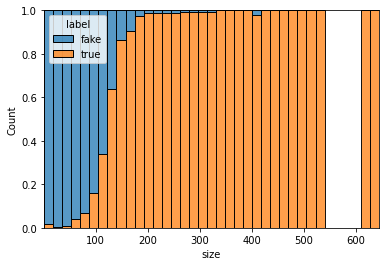

In [ ]:
sizeDistributionByLabel(featureCounts.label, featureCounts.numFeatures)

<AxesSubplot:xlabel='size', ylabel='Count'>

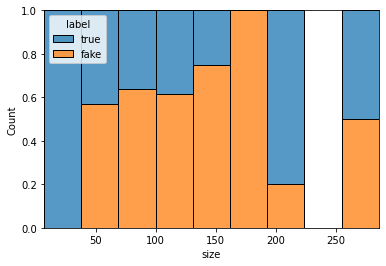

In [ ]:
missclassified = featureCountsVal[yVal != ypred]
sizeDistributionByLabel(missclassified.label, missclassified.numFeatures)

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(
    tfidf, FunctionTransformer(lambda X: X.toarray()), sft, svc
)

In [ ]:
import lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=pipeline.classes_)

In [ ]:
def explain(text, model):
  exp = explainer.explain_instance(text, model.predict_proba, num_features=10)
  exp.show_in_notebook(text=True)

In [ ]:
text = train.sample().text.values[0]
explain(text, pipeline)

In [ ]:
pipeline.predict(train.text.values[:10])

array(['fake', 'true', 'true', 'true', 'fake', 'fake', 'fake', 'fake',
       'fake', 'true'], dtype=object)

In [ ]:
from utils.dataset_balacing import numWordBalancing
from tqdm.notebook import tqdm

In [ ]:
balanced = numWordBalancing(train, tqdm)

<AxesSubplot:xlabel='size', ylabel='Count'>

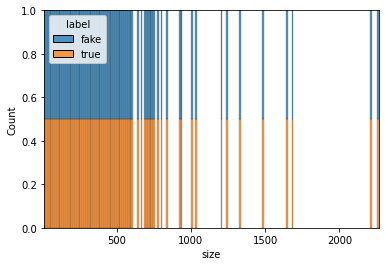

In [ ]:
sizeDistributionByLabel(balanced.label, balanced.numWords)

In [ ]:
balanced.shape, train.shape

((6094, 31), (6120, 29))

In [ ]:
# balanced.drop(columns=['words']).to_csv('train_balanced.csv', index=False)